In [113]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [114]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 15\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<Axes: >

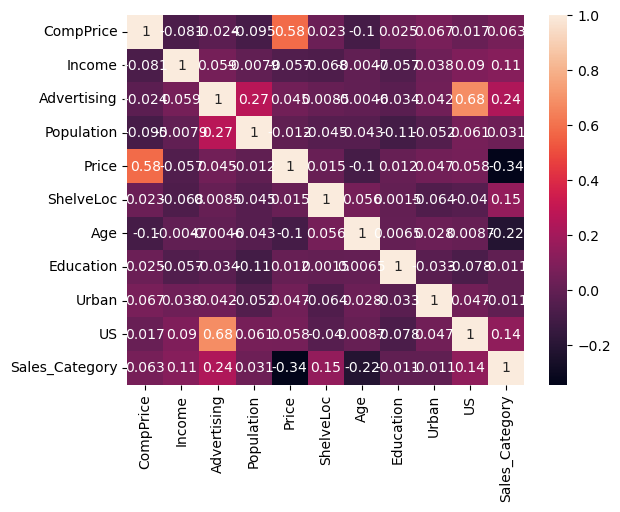

In [122]:
sns.heatmap(data.corr(),annot=True)

In [115]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
columns=['ShelveLoc','Urban','US']
for i in columns:
  data[i]=lb.fit_transform(data[i])

In [116]:
data['Sales_Category'] = pd.cut(data['Sales'], bins=[0, 5, 10, 15, 20], labels=['Low', 'Medium', 'High','Very High'])
data.drop(columns='Sales')

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,0,42,17,1,1,Medium
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Medium
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Medium
397,162,26,12,368,159,2,40,18,1,1,Medium
398,100,79,7,284,95,0,50,12,1,1,Medium


In [117]:
data_mapping = {'Low': 0, 'Medium': 1, 'High': 2} 
data['Sales_Category'] = data['Sales_Category'].map(data_mapping)
data.drop(columns='Sales',inplace=True)

In [118]:
data['Sales_Category']=lb.fit_transform(data['Sales_Category'])
x = data.iloc[:,: 9]
y = data.iloc[:,10:]

In [119]:
num_trees=100
max_features=4
seed=10
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,random_state=seed)
results=cross_val_score(model,x,y,cv=KFold(n_splits=5,random_state=seed,shuffle=True))
results.mean()*100

66.5

In [120]:
model.fit(x,y)
print(model.feature_importances_)

[0.13230746 0.11605099 0.08953307 0.1083956  0.21728446 0.11842176
 0.14061856 0.06394321 0.01344491]


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
     

estimators=[]
model3=LogisticRegression()
estimators.append(('Logistic',model3))
model4=SVC()
estimators.append(('SVC',model4))
model5=DecisionTreeClassifier()
estimators.append(('DecisionTreeClassifier',model5))
     

ensemble=VotingClassifier(estimators)
results_stack = cross_val_score(ensemble, x, y, cv=KFold(n_splits=5))
print(results_stack.mean()*100)

64.25
